# Example application of pydune

#### Introduction

This notebook demonstrates the key steps of using pydune, including:
1. [Creating a custom classifier from data](#1)
2. [Instaniating and using the pydune `Profile` class to predict dune toe location](#2)
3. [Some example figures](#3)

#### Imports

In [3]:
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydune.pydune import Profile
from pydune.support import data_support as ds
from pydune.support import classifier_support as cs

#### Example Data

In [29]:
x = np.arange(0, 80, 0.5)
z = np.concatenate((np.linspace(4, 5, 40),
                    np.linspace(5, 2, 10),
                    np.linspace(2, 0, 91)[1:],
                    np.linspace(0, -1, 20)))

toe = np.array([50])

#### Instantiate `profile` class

In [5]:
p = Profile(x, z)

#### Make predictions using available methods

In [49]:
# Make predictions
toe_ml, prob_ml = p.predict_dunetoe_ml('wave_embayed_clf')
toe_mc = p.predict_dunetoe_mc()
toe_rr = p.predict_dunetoe_rr()
toe_pd = p.predict_dunetoe_pd()
crest = p.predict_dunecrest()
shoreline = p.predict_shoreline()

#### Plot

In [41]:
# Plotting Paramaters
params = {'legend.fontsize': 12,
           'axes.labelsize': 14,
           'axes.labelweight': 'bold',
           'axes.titlesize': 14,
           'axes.titleweight': 'bold',
           'xtick.labelsize': 14,
           'ytick.labelsize': 14,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

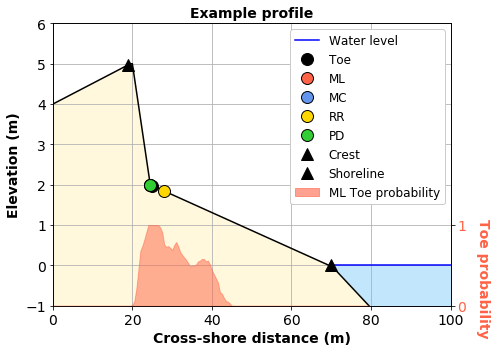

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
toes = [toe, toe_ml, toe_mc, toe_rr, toe_pd]
labels = ['Toe', 'ML', 'MC', 'RR', 'PD']
colors = ['k', 'tomato', 'cornflowerblue', 'gold', 'limegreen']

axes.set_title('Example profile')
axes.plot(x, z, '-k')
axes.plot([70, 100], [0, 0], 'b', label="Water level")
axes.fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes.fill_between(x, z, y2=-1, color='cornsilk', alpha=1)
axes.axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes.plot(x[itoe], z[itoe],
              'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes.plot(x[crest], z[crest], '^', color='k', ms=12, mec='k', label='Crest')
axes.plot(x[shoreline], z[shoreline], '^', color='k', ms=12, mec='k', label='Shoreline')
axes.set_xlim(0, 100)
axes.set_ylim(-1, 6)
axes.set_xlabel('Cross-shore distance (m)')
axes.set_ylabel('Elevation (m)')
axes.grid()
axes.legend(framealpha=1)

axes2 = axes.twinx() 
axes2.fill_between(x, prob_ml[0], color='tomato', alpha=0.5)
axes2.set_ylim(0, 3.5)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
axes2.set_ylabel('Toe probability', color='tomato', rotation=270)

plt.tight_layout()